# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
#%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
#%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data.shape

(4324, 9)

In [ ]:
num_rows = df_data.shape[0]
num_cols = df_data.shape[1]
print(f"The dataframe has {num_rows} rows and {num_cols} columns.")

The dataframe has 4324 rows and 9 columns.


In [ ]:
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
print(f"The column names are:  {', '.join(df_data.columns)}")

The column names are:  Unnamed: 0, Unnamed: 0.1, Organisation, Location, Date, Detail, Rocket_Status, Price, Mission_Status


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [ ]:
print(f"Are there any dup values?  {df_data.duplicated().values.any()}")

Are there any dup values?  False


In [ ]:
print(f"Are there any NaN values?  {df_data.isna().values.any()}")

Are there any NaN values?  True


In [ ]:
df_data[df_data.isna().values]

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df_data.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [ ]:
# df_data.drop("Price", axis=1, inplace=True)
# df_data.shape

## Descriptive Statistics

In [ ]:
df_data.describe()

,Unnamed: 0,Unnamed: 0.1
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [ ]:
df_data.Price = df_data.Price.replace(',', '', regex=True)
df_data.Price = pd.to_numeric(df_data.Price)
df_data.Price.describe()

count     964.00
mean      153.79
std       288.45
min         5.30
25%        40.00
50%        62.00
75%       164.00
max     5,000.00
Name: Price, dtype: float64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
missions_by_org = df_data.groupby(['Organisation'],
                                  as_index=False).agg({'Detail': pd.Series.count})
missions_by_org.sort_values('Detail', ascending=False, inplace=True)
missions_by_org.head(15)

,Organisation,Detail
40,RVSN USSR,1777
3,Arianespace,279
17,General Dynamics,251
7,CASC,251
35,NASA,203
52,VKS RF,201
49,US Air Force,161
48,ULA,140
6,Boeing,136
34,Martin Marietta,114


In [ ]:
chart = px.bar(missions_by_org,
               x="Detail",
               y="Organisation",
               color="Detail",
               color_continuous_scale='thermal',
               title="Number of Space Mission Launches by Organisation")
chart.update_layout(xaxis_title='Number of Launches',
                    yaxis_title='Organisation',
                    coloraxis_showscale=False,
                    yaxis=dict(autorange="reversed"))
chart.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
rockets_by_status = df_data.Rocket_Status.value_counts()
rockets_by_status

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [ ]:
rocket_status_pie = px.pie(labels=rockets_by_status.index, 
                      values=rockets_by_status.values,
                      names=rockets_by_status.index,
                      title="Number of Active vs Retired Rockets")
rocket_status_pie.update_traces(textfont_size=15)
rocket_status_pie.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
missions_by_status = df_data.Mission_Status.value_counts()
missions_by_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
mission_status_pie = px.pie(labels=missions_by_status.index, 
                            values=missions_by_status.values,
                            names=missions_by_status.index,
                            title="Successful vs Failed Missions")
mission_status_pie.update_traces(textfont_size=15)
mission_status_pie.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [ ]:
df_data_with_price = df_data[df_data.Price.notnull()]
df_data_with_price.sort_values("Price", inplace=True, ascending=False)
df_data_with_price.head(10)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,1916,1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,2000,2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success
3545,3545,3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Wed Jul 16, 1969 13:32 UTC",Saturn V | Apollo 11,StatusRetired,"1,160.00",Success
3603,3603,3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Dec 21, 1968 12:51 UTC",Saturn V | Apollo 8,StatusRetired,"1,160.00",Success
3475,3475,3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sat Apr 11, 1970 19:13 UTC",Saturn V | Apollo 13,StatusRetired,"1,160.00",Success
3511,3511,3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Fri Nov 14, 1969 16:22 UTC",Saturn V | Apollo 12,StatusRetired,"1,160.00",Success
3243,3243,3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Sun Apr 16, 1972 17:54 UTC",Saturn V | Apollo 16,StatusRetired,"1,160.00",Success
3560,3560,3560,NASA,"LC-39B, Kennedy Space Center, Florida, USA","Sun May 18, 1969 16:49 UTC",Saturn V | Apollo 10,StatusRetired,"1,160.00",Success
3180,3180,3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Tue Dec 19, 1972 19:24 UTC",Saturn V | Apollo 17,StatusRetired,"1,160.00",Success
3584,3584,3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA","Mon Mar 03, 1969 16:00 UTC",Saturn V | Apollo 9,StatusRetired,"1,160.00",Success


In [ ]:
hist = px.histogram(df_data_with_price, 
                    x="Price",
                    nbins=20)
hist.update_layout(xaxis_title='Price (in Millions of $ (USD))',
                   yaxis_title='Count of Missions')
# Sort by most common counts
#hist.update_xaxes(categoryorder="total descending")
hist.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [ ]:
df_data.Location

0              LC-39A, Kennedy Space Center, Florida, USA
1       Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...
2                           Pad A, Boca Chica, Texas, USA
3            Site 200/39, Baikonur Cosmodrome, Kazakhstan
4                SLC-41, Cape Canaveral AFS, Florida, USA
                              ...                        
4319             LC-18A, Cape Canaveral AFS, Florida, USA
4320             LC-26A, Cape Canaveral AFS, Florida, USA
4321             LC-18A, Cape Canaveral AFS, Florida, USA
4322            Site 1/5, Baikonur Cosmodrome, Kazakhstan
4323            Site 1/5, Baikonur Cosmodrome, Kazakhstan
Name: Location, Length: 4324, dtype: object

In [ ]:
df_data["Country"] = df_data.Location.str.split(", ").str[-1]
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [ ]:
df_data[df_data.Country == "Russia"]

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success,Russia
42,42,42,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Mon Mar 16, 2020 18:28 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2545,StatusActive,NaN,Success,Russia
46,46,46,VKS RF,"Site 43/3, Plesetsk Cosmodrome, Russia","Thu Feb 20, 2020 08:24 UTC",Soyuz 2.1a/Fregat-M | Meridian-M n†­19L,StatusActive,48.50,Success,Russia
64,64,64,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia","Thu Dec 26, 2019 23:11 UTC","Rokot/Briz KM | Gonets-M ???24, 25, 26 [block-...",StatusRetired,41.80,Success,Russia
73,73,73,VKS RF,"Site 43/3, Plesetsk Cosmodrome, Russia","Wed Dec 11, 2019 08:54 UTC",Soyuz 2.1b/Fregat | Cosmos 2544,StatusActive,48.50,Success,Russia
...,...,...,...,...,...,...,...,...,...,...
4167,4167,4167,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Tue Apr 24, 1962 04:00 UTC",Cosmos-2I (63S1) | Cosmos 3,StatusRetired,NaN,Success,Russia
4171,4171,4171,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Fri Apr 06, 1962 17:15 UTC",Cosmos-2I (63S1) | Cosmos 2,StatusRetired,NaN,Success,Russia
4172,4172,4172,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Fri Mar 16, 1962 11:59 UTC",Cosmos-2I (63S1) | Cosmos 1,StatusRetired,NaN,Success,Russia
4183,4183,4183,RVSN USSR,"Mayak-2, Kapustin Yar, Russia","Thu Dec 21, 1961 12:30 UTC",Cosmos-2I (63S1) | DS-1 2,StatusRetired,NaN,Failure,Russia


In [ ]:
df_data.Country.replace("Russia", "Russian Federation", inplace=True)
df_data.Country.replace("New Mexico", "USA", inplace=True)
df_data.Country.replace("Yellow Sea", "China", inplace=True)
df_data.Country.replace("Shahrud Missile Test Site", "Iran", inplace=True)
df_data.Country.replace("Pacific Missile Range Facility", "USA", inplace=True)
df_data.Country.replace("Barents Sea", "Russian Federation", inplace=True)
df_data.Country.replace("Gran Canaria", "USA", inplace=True)

In [ ]:
alpha3 = {}
for c in countries:
  alpha3[c.name] = c.alpha3
alpha3  

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'AND',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Antarctica': 'ATA',
 'Antigua and Barbuda': 'ATG',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia, Plurinational State of': 'BOL',
 'Bonaire, Sint Eustatius and Saba': 'BES',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Bouvet Island': 'BVT',
 'Brazil': 'BRA',
 'British Indian Ocean Territory': 'IOT',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Chad': 'TCD',
 'Chile': 'CHL',
 

In [ ]:
df_data.replace({"Country": alpha3}, inplace=True)
df_data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ


In [ ]:
launches_by_country = df_data.groupby(['Country'], as_index=False).agg({'Detail': pd.Series.count})

launches_map = px.choropleth(launches_by_country,
                             locations="Country",
                             color="Detail",
                             hover_name="Country",
                             color_continuous_scale=px.colors.sequential.matter,
                             title="Number of Launches by Country")
launches_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
df_failures = df_data[df_data.Mission_Status == "Failure"]
df_failures.shape

(339, 10)

In [ ]:
failures_by_country = df_failures.groupby(['Country'], as_index=False).agg({'Detail': pd.Series.count})

failures_map = px.choropleth(failures_by_country,
                             locations="Country",
                             color="Detail",
                             hover_name="Country",
                             color_continuous_scale=px.colors.sequential.matter,
                             title="Number of Failures by Country")
failures_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
df_country_org_status = df_data.groupby(by=['Country', 'Organisation', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
df_country_org_status = df_country_org_status.sort_values('Detail', ascending=False)
df_country_org_status

,Country,Organisation,Mission_Status,Detail
81,RUS,RVSN USSR,Success,1119
58,KAZ,RVSN USSR,Success,495
19,FRA,Arianespace,Success,267
9,CHN,CASC,Success,231
105,USA,General Dynamics,Success,203
...,...,...,...,...
77,RUS,MITT,Failure,1
82,RUS,Roscosmos,Failure,1
84,RUS,SRC,Failure,1
89,RUS,Yuzhmash,Success,1


In [ ]:
sunburst = px.sunburst(df_country_org_status, 
                       path=['Country', 'Organisation', 'Mission_Status'],
                       values='Detail')
sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
money_by_org = df_data_with_price.groupby('Organisation',
                                          as_index=False).agg({'Price': pd.Series.sum})
money_by_org.sort_values('Price', ascending=False)

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
money_by_org_per_launch = df_data_with_price.groupby('Organisation',
                                          as_index=False).agg({'Price': pd.Series.mean})
money_by_org_per_launch.sort_values('Price', ascending=False)

,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00
7,ILS,101.54
12,MHI,95.47
13,Martin Marietta,80.16
22,US Air Force,59.65
9,JAXA,56.00


# Chart the Number of Launches per Year

In [ ]:
df_data["Year"] = pd.to_datetime(df_data["Date"], format="%a %b %d, %Y", exact=False).dt.year
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020


In [ ]:
launches_per_year = df_data.groupby('Year').count()
launches_per_year

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
Year,,,,,,,,,,
1957,3,3,3,3,3,3,3,0,3,3
1958,28,28,28,28,28,28,28,0,28,28
1959,20,20,20,20,20,20,20,0,20,20
1960,39,39,39,39,39,39,39,0,39,39
1961,52,52,52,52,52,52,52,0,52,52
...,...,...,...,...,...,...,...,...,...,...
2016,90,90,90,90,90,90,90,64,90,90
2017,92,92,92,92,92,92,92,66,92,92
2018,117,117,117,117,117,117,117,88,117,117


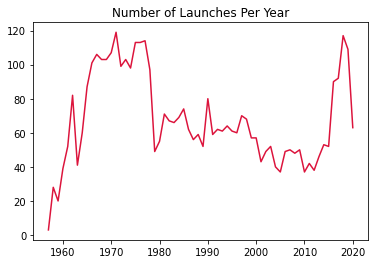

In [ ]:
plt.plot(launches_per_year.index,
         launches_per_year.Detail,
         c='crimson')
plt.title("Number of Launches Per Year")
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [ ]:
df_data.Date = pd.to_datetime(df_data.Date, utc=True)
df_data.Date.dtypes

datetime64[ns, UTC]

In [ ]:
df_data_monthly = df_data.resample('M', on='Date').count()
df_data_monthly

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
Date,,,,,,,,,,,
1957-10-31 00:00:00+00:00,1,1,1,1,1,1,1,0,1,1,1
1957-11-30 00:00:00+00:00,1,1,1,1,1,1,1,0,1,1,1
1957-12-31 00:00:00+00:00,1,1,1,1,1,1,1,0,1,1,1
1958-01-31 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,0
1958-02-28 00:00:00+00:00,2,2,2,2,2,2,2,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30 00:00:00+00:00,5,5,5,5,5,5,5,4,5,5,5
2020-05-31 00:00:00+00:00,9,9,9,9,9,9,9,6,9,9,9
2020-06-30 00:00:00+00:00,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
rolling_monthly = df_data_monthly.rolling(window=6).mean()
rolling_monthly

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
Date,,,,,,,,,,,
1957-10-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-11-30 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1957-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1958-02-28 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-04-30 00:00:00+00:00,9.67,9.67,9.67,9.67,9.67,9.67,9.67,6.83,9.67,9.67,9.67
2020-05-31 00:00:00+00:00,9.17,9.17,9.17,9.17,9.17,9.17,9.17,6.67,9.17,9.17,9.17
2020-06-30 00:00:00+00:00,7.67,7.67,7.67,7.67,7.67,7.67,7.67,6.33,7.67,7.67,7.67


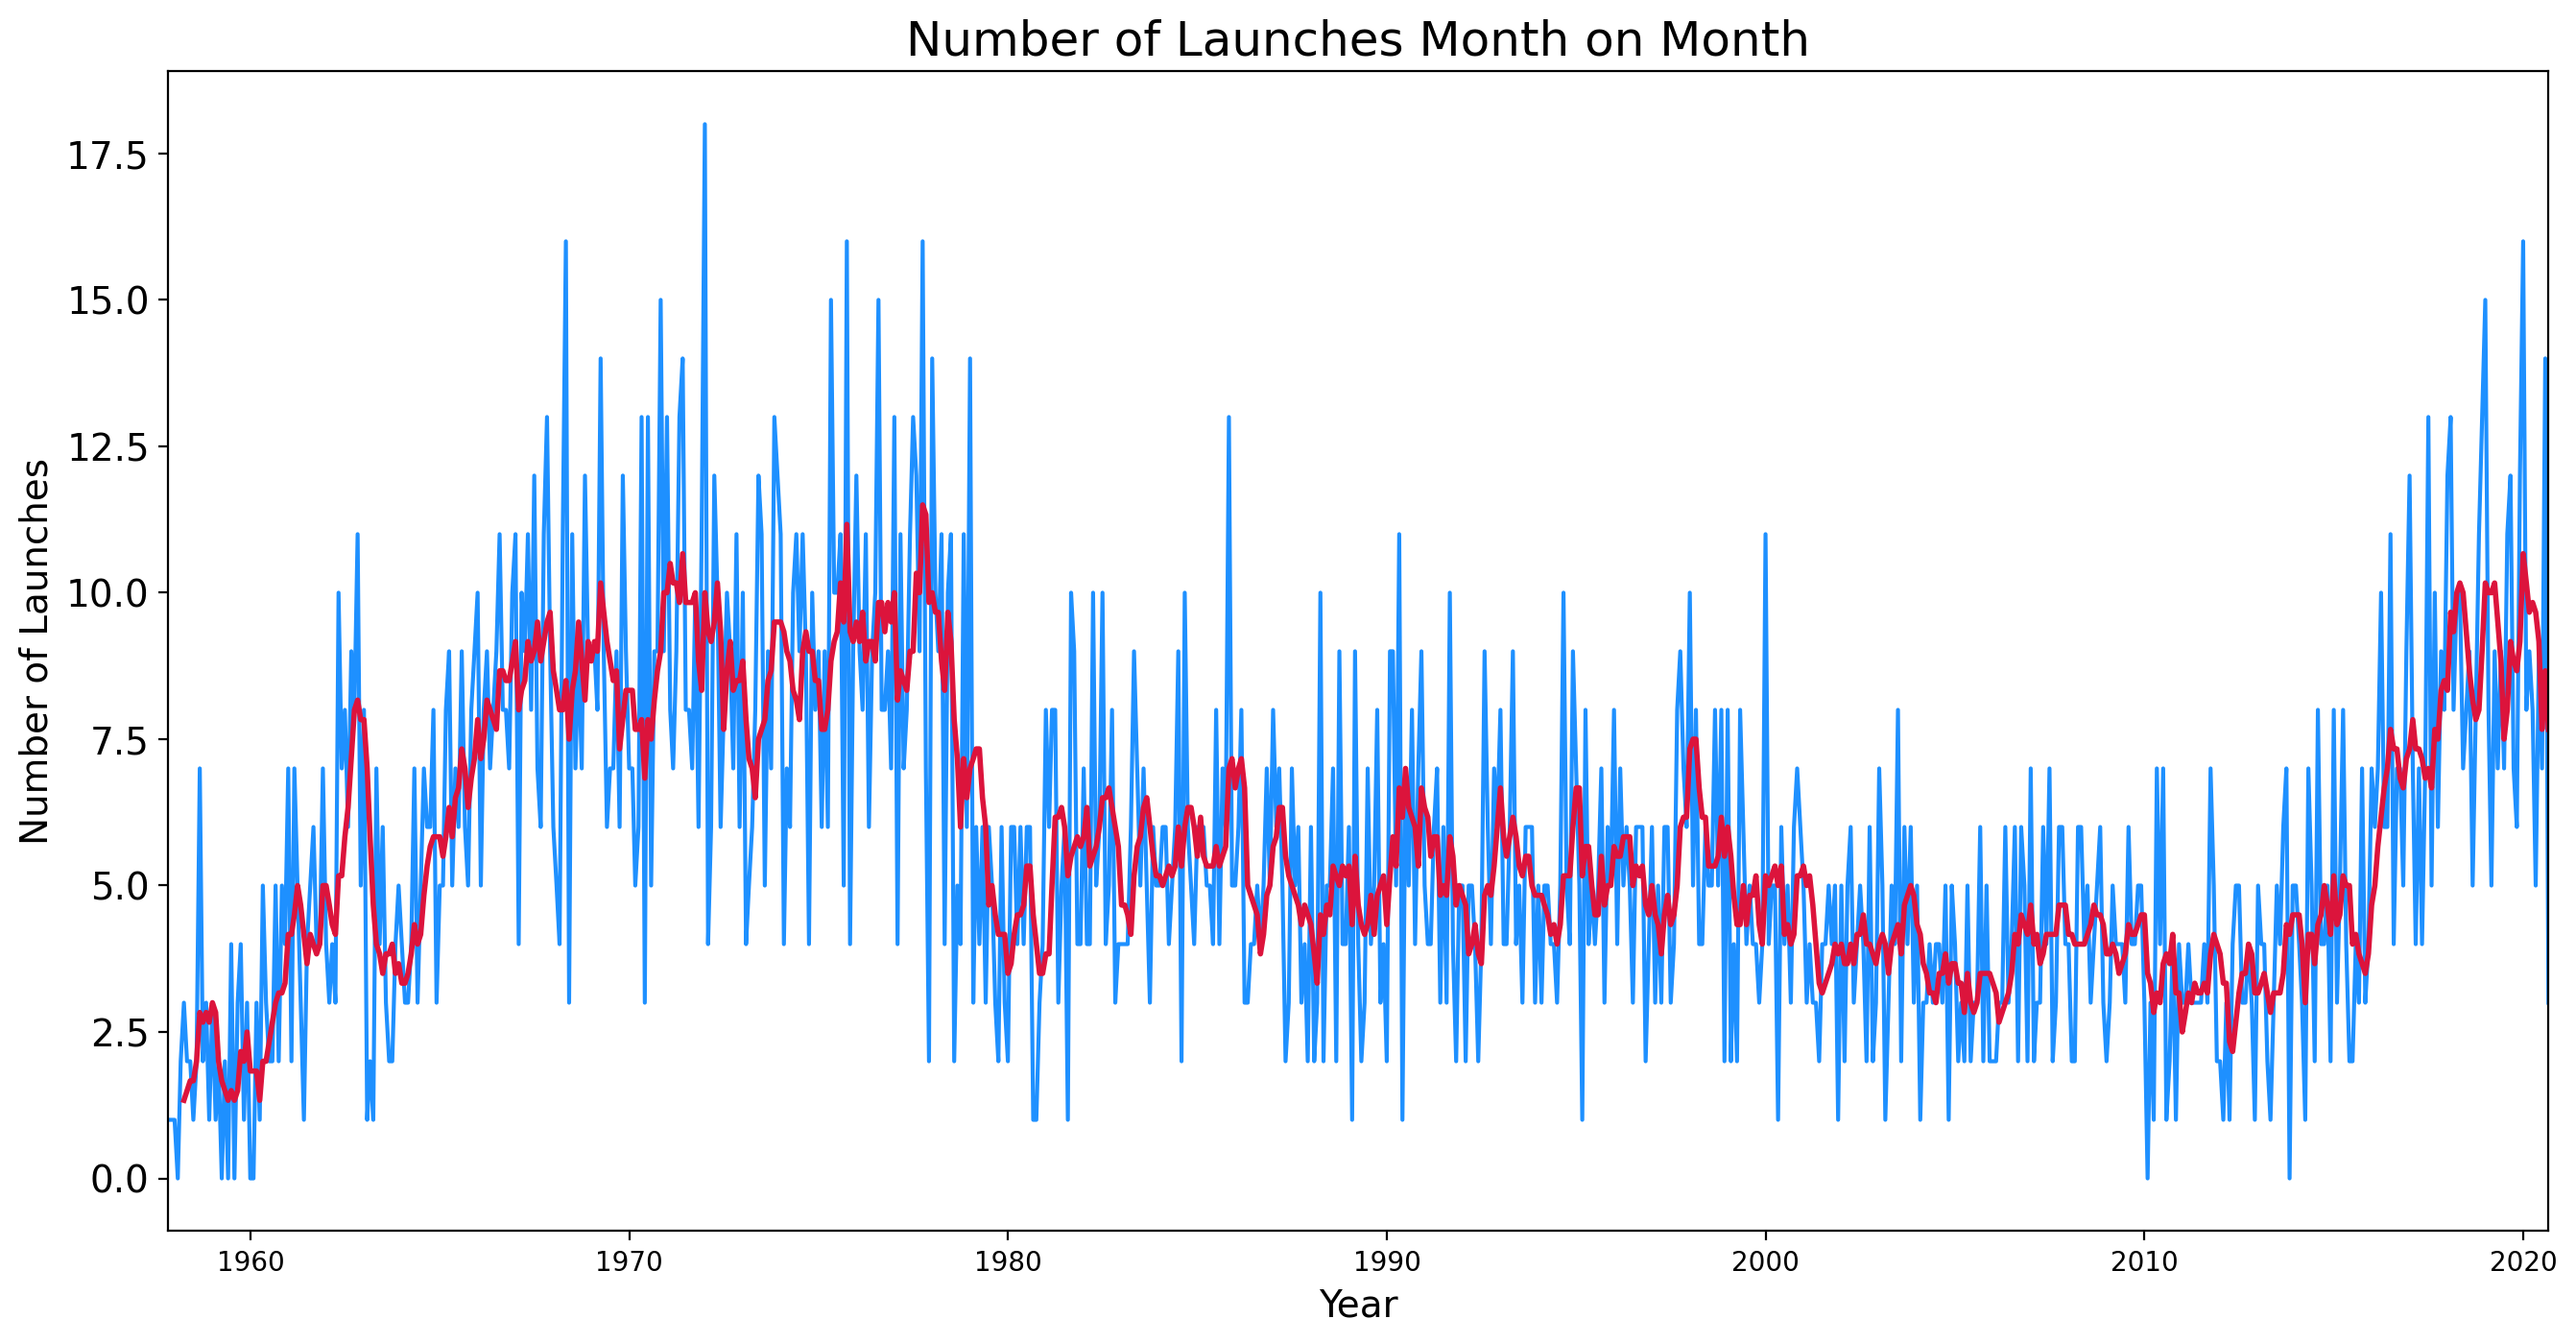

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title("Number of Launches Month on Month", fontsize=18)
plt.yticks(fontsize=14)

ax = plt.gca()
ax.set_xlim(df_data_monthly.index.min(), df_data_monthly.index.max())

ax.plot(df_data_monthly.index,
        df_data_monthly.Detail,
        c='dodgerblue')

ax.plot(rolling_monthly.index, 
        rolling_monthly.Detail,
        c='crimson',
        linewidth=2,)

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Launches', fontsize=14)

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df_data["Month"] = pd.to_datetime(df_data["Date"], format="%a %b %d, %Y", exact=False).dt.month
df_data.head()

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020,8
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020,7


In [ ]:
df_data.groupby('Month').agg({'Detail': pd.Series.count}).sort_values('Detail', ascending=False)

,Detail
Month,
12,450
6,402
4,383
10,381
8,373
9,365
3,353
7,351
2,336


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
price_by_year = df_data.groupby('Year').agg({'Price': pd.Series.mean})

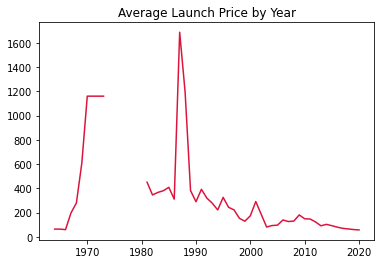

In [ ]:
plt.plot(price_by_year.index,
         price_by_year.Price,
         c='crimson')
plt.title("Average Launch Price by Year")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
launches_by_org = df_data.groupby(['Date', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count}).sort_values('Detail', ascending=False)
launches_by_org

,Date,Organisation,Detail
2584,1991-08-25 08:40:00+00:00,MHI,2
3527,2008-11-05 00:15:00+00:00,CASC,2
2518,1990-08-28 09:05:00+00:00,MHI,2
2479,1990-02-07 01:33:00+00:00,MHI,2
2884,1996-07-03 10:47:00+00:00,CASC,1
...,...,...,...
1445,1975-11-15 10:12:00+00:00,RVSN USSR,1
1446,1975-11-16 03:29:00+00:00,CASC,1
1447,1975-11-17 14:36:00+00:00,RVSN USSR,1
1448,1975-11-21 09:20:00+00:00,RVSN USSR,1


In [ ]:
top_10_orgs = df_data.Organisation.value_counts().head(10).index
top_10_orgs

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object')

In [ ]:
launches_by_org_per_year = df_data.groupby(['Year', 'Organisation'],
                                           as_index=False).agg({'Detail': pd.Series.count})
launches_by_org_per_year

,Year,Organisation,Detail
0,1957,RVSN USSR,2
1,1957,US Navy,1
2,1958,AMBA,7
3,1958,NASA,2
4,1958,RVSN USSR,5
...,...,...,...
658,2020,Roscosmos,4
659,2020,SpaceX,14
660,2020,ULA,4
661,2020,VKS RF,3


In [ ]:
launches_nasa = launches_by_org_per_year[launches_by_org_per_year.Organisation == "NASA"]
launches_nasa.sort_values('Year', ascending=False).head()

,Year,Organisation,Detail
525,2011,NASA,3
512,2010,NASA,3
499,2009,NASA,6
484,2008,NASA,4
471,2007,NASA,3


In [ ]:
launches_by_org_per_year.set_index('Year', inplace=True)

In [ ]:
launches_by_org_per_year.index

Int64Index([1957, 1957, 1958, 1958, 1958, 1958, 1958, 1959, 1959, 1959,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Year', length=663)

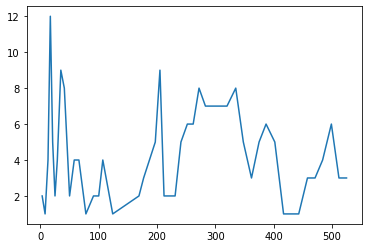

In [ ]:
plt.plot(launches_nasa.index, launches_nasa.Detail)

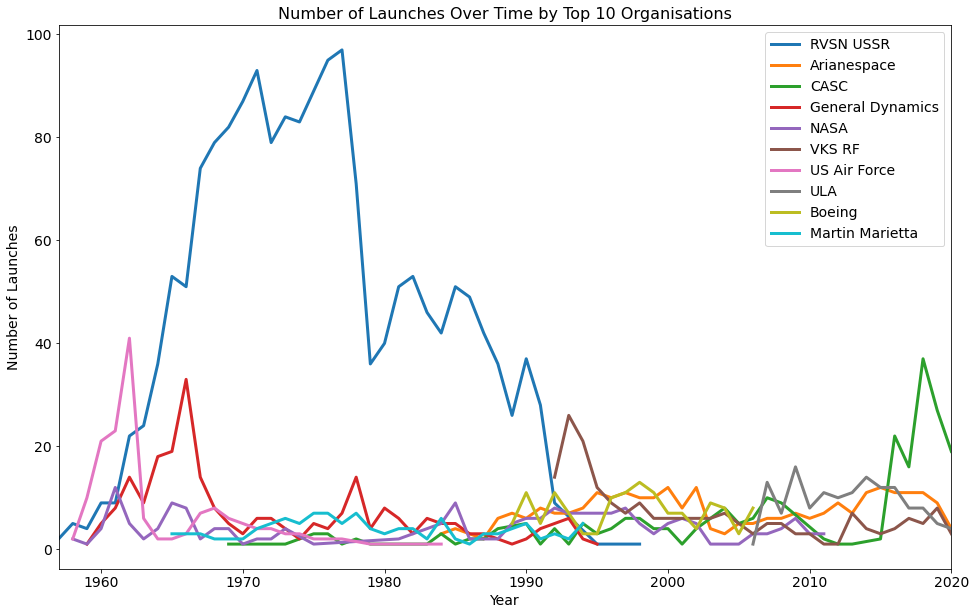

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.xlim(launches_per_year.index.min(), launches_per_year.index.max())

# plot line for each of top 10 orgs using for loop
for org in top_10_orgs:
  launches_org = launches_by_org_per_year[launches_by_org_per_year.Organisation == org]
  plt.plot(launches_org.index, launches_org.Detail,
           linewidth=3, label=org)

plt.title("Number of Launches Over Time by Top 10 Organisations", fontsize=16)
plt.legend(fontsize=14)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [ ]:
df_cold_war = df_data[df_data.Date <= "1991-01-01 00:00:00+00:00"]
df_cold_war

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1776,1776,1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1990-12-22 07:28:00+00:00,Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,RUS,1990,12
1777,1777,1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1990-12-10 07:54:00+00:00,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,RUS,1990,12
1778,1778,1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1990-12-04 00:48:00+00:00,Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,KAZ,1990,12
1779,1779,1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,1990,12
1780,1780,1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA,1990,12
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958,2
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,2
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,12
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957,11


In [ ]:
df_cold_war.Country = df_cold_war.Country.replace('KAZ', 'USSR')
df_cold_war.Country = df_cold_war.Country.replace('RUS', 'USSR')
df_cold_war

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1776,1776,1776,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1990-12-22 07:28:00+00:00,Tsyklon-3 | Cosmos 2114 to 2119,StatusRetired,NaN,Success,USSR,1990,12
1777,1777,1777,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1990-12-10 07:54:00+00:00,Cosmos-3M (11K65M) | Cosmos 2112,StatusRetired,NaN,Success,USSR,1990,12
1778,1778,1778,RVSN USSR,"Site 90/20, Baikonur Cosmodrome, Kazakhstan",1990-12-04 00:48:00+00:00,Tsyklon-2 | Cosmos 2107,StatusRetired,NaN,Success,USSR,1990,12
1779,1779,1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,1990,12
1780,1780,1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA,1990,12
...,...,...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,1958,2
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,2
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,12
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,1957,11


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
cold_war_countries_by_launch_count = df_cold_war.groupby('Country').agg({'Detail': pd.Series.count})
cold_war_countries_by_launch_count

,Detail
Country,
AUS,6
CHN,37
FRA,53
IND,7
ISR,2
JPN,49
KEN,9
USA,644
USSR,1741


In [ ]:
cold_war_countries_by_launch_count_filtered = cold_war_countries_by_launch_count.filter(items=["USA", "USSR"], axis=0)
cold_war_countries_by_launch_count_filtered

,Detail
Country,
USA,644
USSR,1741


In [ ]:
cold_war_ussr_vs_usa_pie = px.pie(labels=cold_war_countries_by_launch_count_filtered.index,
                                  values=cold_war_countries_by_launch_count_filtered.Detail,
                                  names=cold_war_countries_by_launch_count_filtered.index,
                                  title="Cold War - Number of Launches - USSR vs USA")
cold_war_ussr_vs_usa_pie.update_traces(textfont_size=15)
cold_war_ussr_vs_usa_pie.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
# Filter for USA and USSR only
df_cold_war_filtered = pd.concat([df_cold_war[df_cold_war.Country == "USA"], df_cold_war[df_cold_war.Country == "USSR"]])
df_cold_war_filtered

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1779,1779,1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,1990,12
1780,1780,1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA,1990,12
1782,1782,1782,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA",1990-11-26 21:39:00+00:00,Delta II 7925 | USA-66 (GPS IIA-1),StatusRetired,NaN,Success,USA,1990,11
1787,1787,1787,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1990-11-15 23:48:00+00:00,Space Shuttle Atlantis | STS-38,StatusRetired,450.00,Success,USA,1990,11
1789,1789,1789,Martin Marietta,"SLC-41, Cape Canaveral AFS, Florida, USA",1990-11-13 00:37:00+00:00,Titan IV(402)A | DSP,StatusRetired,NaN,Success,USA,1990,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4301,4301,4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,USSR,1958,9
4313,4313,4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,USSR,1958,5
4315,4315,4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,USSR,1958,4
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,1957,11


In [ ]:
launches_by_country_per_year = df_cold_war_filtered.groupby(['Year', 'Country'],
                                                            as_index=False).agg({'Detail': pd.Series.count})
launches_by_country_per_year

,Year,Country,Detail
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
...,...,...,...
63,1988,USSR,36
64,1989,USA,16
65,1989,USSR,26
66,1990,USA,26


In [ ]:
launches_by_country_per_year.set_index('Year', inplace=True)
launches_by_country_per_year.index

Int64Index([1957, 1957, 1958, 1958, 1959, 1959, 1960, 1960, 1961, 1961, 1962,
            1962, 1963, 1963, 1964, 1964, 1965, 1965, 1966, 1966, 1967, 1967,
            1968, 1968, 1969, 1969, 1970, 1970, 1971, 1971, 1972, 1972, 1973,
            1973, 1974, 1974, 1975, 1975, 1976, 1976, 1977, 1977, 1978, 1978,
            1979, 1979, 1980, 1980, 1981, 1981, 1982, 1982, 1983, 1983, 1984,
            1984, 1985, 1985, 1986, 1986, 1987, 1987, 1988, 1988, 1989, 1989,
            1990, 1990],
           dtype='int64', name='Year')

No handles with labels found to put in legend.


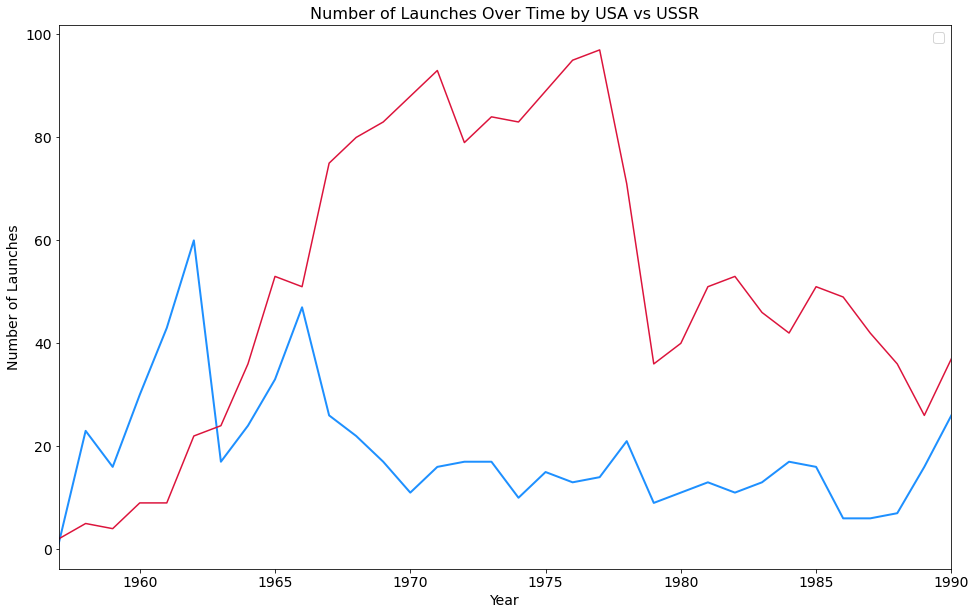

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.xlim(launches_by_country_per_year.index.min(), launches_by_country_per_year.index.max())

# Plot USA
plt.plot(launches_by_country_per_year[launches_by_country_per_year.Country == "USA"].index,
         launches_by_country_per_year[launches_by_country_per_year.Country == "USA"].Detail,
         c="dodgerblue",
         linewidth=2)

# Plot USSR
plt.plot(launches_by_country_per_year[launches_by_country_per_year.Country == "USSR"].index,
         launches_by_country_per_year[launches_by_country_per_year.Country == "USSR"].Detail,
         c="crimson")

plt.title("Number of Launches Over Time by USA vs USSR", fontsize=16)
plt.legend(fontsize=14)

## Chart the Total Number of Mission Failures Year on Year.

In [ ]:
df_cold_war_failures = df_cold_war_filtered[df_cold_war_filtered.Mission_Status == "Failure"]
df_cold_war_failures

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1837,1837,1837,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA",1990-03-14 11:52:00+00:00,Commercial Titan III | Intelsat 603,StatusRetired,136.60,Failure,USA,1990,3
2005,2005,2005,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1987-03-26 21:22:00+00:00,Atlas-G Centaur-D1AR | FLTSATCOM-6,StatusRetired,NaN,Failure,USA,1987,3
2066,2066,2066,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA",1986-04-18 18:45:00+00:00,Titan 34D | KH-9,StatusRetired,NaN,Failure,USA,1986,4
2079,2079,2079,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1986-01-28 16:38:00+00:00,Space Shuttle Challenger | STS-51-L,StatusRetired,450.00,Failure,USA,1986,1
2114,2114,2114,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA",1985-08-28 21:20:00+00:00,Titan 34D | KH-11,StatusRetired,NaN,Failure,USA,1985,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4286,4286,4286,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1959-06-18 08:08:00+00:00,Vostok | E-1A n†­1 (Luna-2),StatusRetired,NaN,Failure,USSR,1959,6
4295,4295,4295,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-12-04 18:18:00+00:00,Vostok | E-1 n†­3 (Luna-1),StatusRetired,NaN,Failure,USSR,1958,12
4298,4298,4298,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-10-11 21:41:00+00:00,Vostok | E-1 n†­2 (Luna-1),StatusRetired,NaN,Failure,USSR,1958,10
4301,4301,4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,USSR,1958,9


In [ ]:
failures_by_country_per_year = df_cold_war_failures.groupby(['Year', 'Country'],
                                                            as_index=False).agg({'Detail': pd.Series.count})
failures_by_country_per_year.set_index('Year', inplace=True)
failures_by_country_per_year

,Country,Detail
Year,,
1957,USA,1
1958,USA,16
1958,USSR,4
1959,USA,8
1959,USSR,1
1960,USA,14
1960,USSR,6
1961,USA,13
1961,USSR,4


No handles with labels found to put in legend.


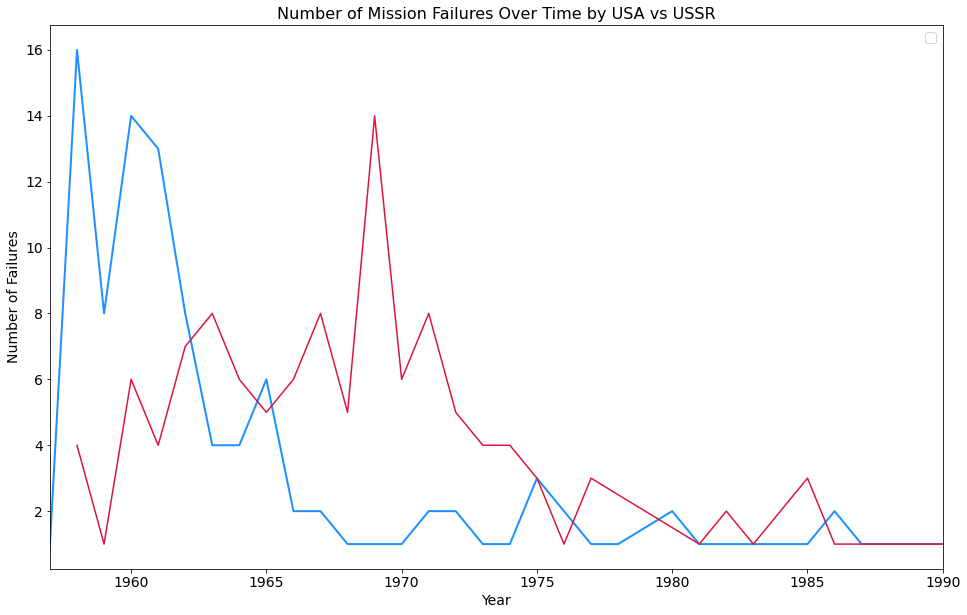

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Failures', fontsize=14)
plt.xlim(failures_by_country_per_year.index.min(), failures_by_country_per_year.index.max())

# Plot USA
plt.plot(failures_by_country_per_year[failures_by_country_per_year.Country == "USA"].index,
         failures_by_country_per_year[failures_by_country_per_year.Country == "USA"].Detail,
         c="dodgerblue",
         linewidth=2)

# Plot USSR
plt.plot(failures_by_country_per_year[failures_by_country_per_year.Country == "USSR"].index,
         failures_by_country_per_year[failures_by_country_per_year.Country == "USSR"].Detail,
         c="crimson")

plt.title("Number of Mission Failures Over Time by USA vs USSR", fontsize=16)
plt.legend(fontsize=14)

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [ ]:
mission_status_by_country_per_year = df_cold_war_filtered.groupby(['Year', 'Country', 'Mission_Status'],
                                                                  as_index=False).agg({'Detail': pd.Series.count})
mission_status_by_country_per_year

,Year,Country,Mission_Status,Detail
0,1957,USA,Failure,1
1,1957,USSR,Success,2
2,1958,USA,Failure,16
3,1958,USA,Partial Failure,2
4,1958,USA,Success,5
...,...,...,...,...
150,1990,USA,Failure,1
151,1990,USA,Success,25
152,1990,USSR,Failure,1
153,1990,USSR,Partial Failure,1


In [ ]:
mission_status_per_year_usa = mission_status_by_country_per_year[mission_status_by_country_per_year.Country == "USA"]
mission_status_per_year_ussr = mission_status_by_country_per_year[mission_status_by_country_per_year.Country == "USSR"]

cold_war_totals_usa = mission_status_per_year_usa.groupby('Year').sum()
cold_war_totals_ussr = mission_status_per_year_ussr.groupby('Year').sum()

cold_war_failures_usa = mission_status_per_year_usa[mission_status_per_year_usa.Mission_Status != "Success"].groupby('Year').sum()
cold_war_failures_ussr = mission_status_per_year_ussr[mission_status_per_year_ussr.Mission_Status != "Success"].groupby('Year').sum()

In [ ]:
# NaN values indicate 0% failure rate for that year
failure_pct_usa = (cold_war_failures_usa / cold_war_totals_usa).fillna(0)
failure_pct_ussr = (cold_war_failures_ussr / cold_war_totals_ussr).fillna(0)
failure_pct_usa

,Detail
Year,
1957,1.00
1958,0.78
1959,0.62
1960,0.47
1961,0.37
1962,0.17
1963,0.24
1964,0.21
1965,0.21


No handles with labels found to put in legend.


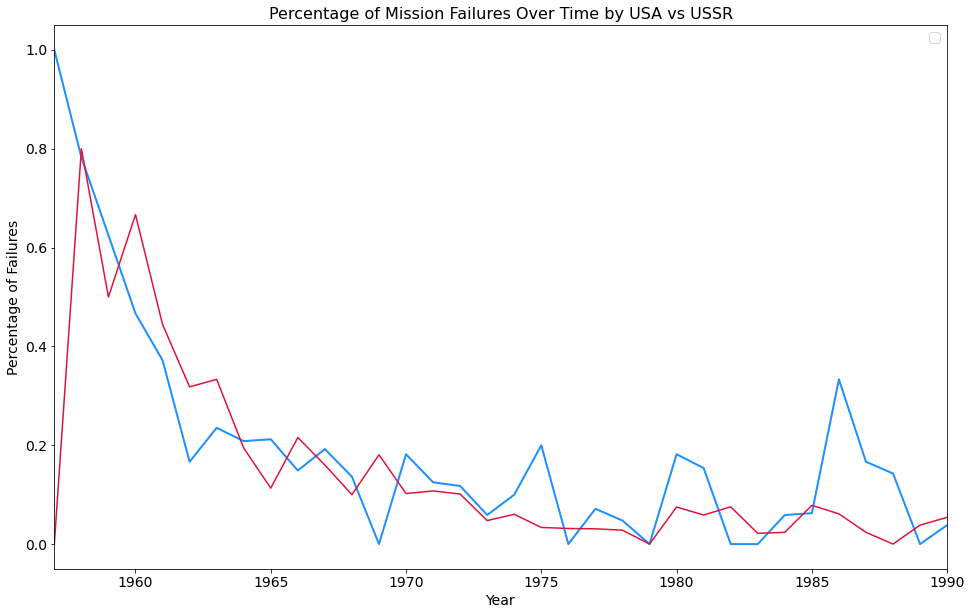

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage of Failures', fontsize=14)
plt.xlim(failures_by_country_per_year.index.min(), failures_by_country_per_year.index.max())

# Plot USA
plt.plot(failure_pct_usa.index,
         failure_pct_usa.Detail,
         c="dodgerblue",
         linewidth=2)

# Plot USSR
plt.plot(failure_pct_ussr.index,
         failure_pct_ussr.Detail,
         c="crimson")

plt.title("Percentage of Mission Failures Over Time by USA vs USSR", fontsize=16)
plt.legend(fontsize=14)

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [ ]:
launches_by_country_per_year = df_cold_war_filtered.groupby(['Year', 'Country'],
                                                            as_index=False).agg({'Detail': pd.Series.count})
launches_by_country_per_year

,Year,Country,Detail
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,16
...,...,...,...
63,1988,USSR,36
64,1989,USA,16
65,1989,USSR,26
66,1990,USA,26


In [ ]:
cold_war_yearly_comparison_hist = px.histogram(launches_by_country_per_year, 
                                               x="Year", y="Detail",
                                               color="Country",
                                               barmode="group",
                                               nbins=34,
                                               title="Launches by Year USA vs USSR")
cold_war_yearly_comparison_hist.update_layout(xaxis_title='Year',
                                              yaxis_title='Count of Missions',
                                              xaxis_tickangle=45)
cold_war_yearly_comparison_hist.show()

In [ ]:
df_cold_war_filtered_successful_launches = df_cold_war_filtered[df_cold_war_filtered.Mission_Status == "Success"]
df_cold_war_filtered_successful_launches

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
1779,1779,1779,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1990-12-02 06:49:00+00:00,Space Shuttle Columbia | STS-35,StatusRetired,450.00,Success,USA,1990,12
1780,1780,1780,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1990-12-01 15:57:00+00:00,Atlas-E/F Star-37S-ISS | DMSP F-10,StatusRetired,NaN,Success,USA,1990,12
1782,1782,1782,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA",1990-11-26 21:39:00+00:00,Delta II 7925 | USA-66 (GPS IIA-1),StatusRetired,NaN,Success,USA,1990,11
1787,1787,1787,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1990-11-15 23:48:00+00:00,Space Shuttle Atlantis | STS-38,StatusRetired,450.00,Success,USA,1990,11
1789,1789,1789,Martin Marietta,"SLC-41, Cape Canaveral AFS, Florida, USA",1990-11-13 00:37:00+00:00,Titan IV(402)A | DSP,StatusRetired,NaN,Success,USA,1990,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4276,4276,4276,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1959-10-04 00:43:00+00:00,Vostok | Luna-3,StatusRetired,NaN,Success,USSR,1959,10
4279,4279,4279,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1959-09-12 06:39:00+00:00,Vostok | Luna-2,StatusRetired,NaN,Success,USSR,1959,9
4313,4313,4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,USSR,1958,5
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,USSR,1957,11


In [ ]:
successful_launches_by_country_per_year = df_cold_war_filtered_successful_launches.groupby(['Year', 'Country'],
                                                                                           as_index=False).agg({'Detail': pd.Series.count})

In [ ]:
success_cold_war_yearly_comparison_hist = px.histogram(successful_launches_by_country_per_year, 
                                               x="Year", y="Detail",
                                               color="Country",
                                               barmode="group",
                                               nbins=34,
                                               title="Launches by Year USA vs USSR (SUCCESSFUL LAUNCHES ONLY)")
success_cold_war_yearly_comparison_hist.update_layout(xaxis_title='Year',
                                              yaxis_title='Count of Successful Missions',
                                              xaxis_tickangle=45)
success_cold_war_yearly_comparison_hist.show()

In [ ]:
launches_by_country_per_year = df_data.groupby(['Year', 'Country'],
                                                as_index=False).agg({'Detail': pd.Series.count})
launches_by_country_per_year

,Year,Country,Detail
0,1957,KAZ,2
1,1957,USA,1
2,1958,KAZ,5
3,1958,USA,23
4,1959,KAZ,4
...,...,...,...
422,2020,JPN,3
423,2020,KAZ,6
424,2020,NZL,3
425,2020,RUS,3


In [ ]:
bar = px.bar(launches_by_country_per_year,
             x="Year",
             y="Detail",
             color="Country",
             title="Leading Country in Terms of Total Number of Launches per Year")
bar.update_layout(xaxis_title='Year',
                    yaxis_title='Number of Launches',
                    coloraxis_showscale=False)
bar.show()

In [ ]:
launches_by_country_per_year = df_data.groupby(['Year', 'Country']).agg({'Detail': pd.Series.count})
leading_country = pd.DataFrame(launches_by_country_per_year['Detail'].groupby('Year', group_keys=False).nlargest(1))
leading_country.reset_index(inplace=True) 
leading_country

,Year,Country,Detail
0,1957,KAZ,2
1,1958,USA,23
2,1959,USA,16
3,1960,USA,30
4,1961,USA,43
...,...,...,...
59,2016,USA,27
60,2017,USA,30
61,2018,CHN,39
62,2019,CHN,34


In [ ]:
bar2 = px.bar(leading_country,
              x="Year",
              y="Detail",
              hover_data=["Country"],
              title="Leading Country in Terms of Total Number of Launches per Year")
bar2.update_layout(xaxis_title='Year',
                    yaxis_title='Number of Launches')
bar2.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [ ]:
launches_by_org_per_year = df_data.groupby(['Year', 'Organisation']).agg({'Detail': pd.Series.count})
leading_org = pd.DataFrame(launches_by_org_per_year['Detail'].groupby('Year', group_keys=False).nlargest(1))
leading_org.reset_index(inplace=True) 
leading_org

,Year,Organisation,Detail
0,1957,RVSN USSR,2
1,1958,US Navy,12
2,1959,US Air Force,10
3,1960,US Air Force,21
4,1961,US Air Force,23
...,...,...,...
59,2016,CASC,22
60,2017,SpaceX,18
61,2018,CASC,37
62,2019,CASC,27


In [ ]:
bar3 = px.bar(leading_org,
              x="Year",
              y="Detail",
              hover_data=["Organisation"],
              title="Leading Organization in Terms of Total Number of Launches per Year")
bar3.update_layout(xaxis_title='Year',
                   yaxis_title='Number of Launches')
bar3.show()